# Welcome to the Dark Art of Coding:
## Introduction to Machine Learning
Linear Regression

<img src='../universal_images/dark_art_logo.600px.png' width='300' style="float:right">

# Objectives
---

In this session, students should expect to:

* Cover an overview of Linear Regression
* Examine code samples that walk us through **The Process™**:
   * Prep the data
   * Choose the model
   * Choose appropriate hyperparameters
   * Fit the model
   * Apply the model
   * Examine the results
* Explore a deep dive into this model
* Review some gotchas that might complicate things
* Review tips related to learning more

# Overview: Linear Regression
---

Linear Regression models are popular machine learning models because they:
* are often fast
* are often simple with few tunable hyperparameters
* are very easy to interpret
* can provide a nice baseline classification to start with before considering more sophisticated models

Several cases where you might use a linear regression to predict an output based on a set of inputs include:

|Inputs|Outputs|
|:---|:---|
|ad dollars spent|sales dollars earned|
|car age|sale price|
|latitude|skin cancer mortality|

The LinearRegression model that we will examine here relies upon the Ordinary Least Squares (OLS) method to calculate a linear function that fits the input data.

From [Wikipedia](https://en.wikipedia.org/wiki/Ordinary_least_squares): "Geometrically, this is seen as the sum of the squared distances, ... between each data point in the set and the corresponding point on the regression surface – **the smaller the differences, the better the model fits the data**."

The result of the simplest type of linear regression calculation is a formula for straight line (although sophisticated curved surfaces can also be determined using linear regression):

$$y = mx + b$$

Where:

Given some value of $x$, if we know the slope of the line ($m$) and the y-intercept ($b$) we can calculate $y$.

Beyond that, we won't cover the math here. 😀

Scikit Learn has a number of Linear Models based on calculations besides OLS: 

* Ridge 
* Lasso
* Huber
* and many more...

Each one has slightly different approaches to calculating a line that fits the data.

**Ridge**: addresses some issues related to OLS by controlling the size of coefficients.

**Lasso**: encourages simple, sparse models (i.e. models with fewer parameters). Can be useful when you want to automate certain parts of model selection, like variable selection/parameter elimination. 

**Huber**: applies a linear loss (lower weight) to samples that are classified as outliers, thus minimizing the impact of random outliers.

With this background, let's apply **The Process™** on a LinearRegression model.

## Prep the data

We start with a set of standard imports...

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# NOTE: during the Choose the Model step, we will import the 
#     model we want, but there is no reason you can't import it here.
# from sklearn.linear_model import LinearRegression

### Prep the training data and test data

For this example, we will use a dataset hosted by Penn State:
    
[skincancer.txt](https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/skincancer/index.txt)

I don't have a clear understanding of the origin of this data and **we are simply using the dataset to demo a technique**. Please don't draw conclusions from the results of this simplistic analysis.

In [31]:
df = pd.read_csv('../universal_datasets/skincancer.txt',
                 delim_whitespace=True,
                 header=0,
                 names=['state', 'lat', 'mort', 'ocean', 'long'])
df.head()

,state,lat,mort,ocean,long
0,Alabama,33.0,219,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5
3,California,37.5,182,1,119.5
4,Colorado,39.0,149,0,105.5


In [32]:
df.shape      

# Ummm. One line per state?
#       How did we get 49 lines?
#       Weird.

(49, 5)

In [33]:
X = df['lat'].to_frame()
y = df['mort']

In [34]:
X[:5]

,lat
0,33.0
1,34.5
2,35.0
3,37.5
4,39.0


In [35]:
y[:5]

0    219
1    160
2    170
3    182
4    149
Name: mort, dtype: int64

With our data imported, let's separate it into training data and test data.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

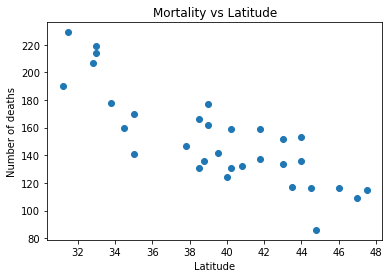

In [38]:
plt.scatter(X_train, y_train)
plt.title("Mortality vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Number of deaths");

## Choose the Model

In this case, we have already decided upon using the LinearRegression model, so importing it is straightforward. But if we aren't sure what model we want we can always refer back to the [API Reference](https://scikit-learn.org/stable/modules/classes.html).

In [39]:
from sklearn.linear_model import LinearRegression

## Choose Appropriate Hyperparameters

For our purposes, this model doesn't require any hyperparameters, so we simply call the `LinearRegression` class.

In [40]:
model = LinearRegression()

If we were to look at the possible hyperparameters, we would see this:

```python
LinearRegression(
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None,
)
```

**Yeah, but what do these even mean?**

Some hyperparameters can be tricky to understand. Good places to start are the documentation:

> [sklearn.linear_model.LinearRegression¶](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

A number of these items are also explained on Stackoverflow:

> [how fit intercept parameter impacts linear regression with scikit learn](https://stackoverflow.com/questions/46510242/how-fit-intercept-parameter-impacts-linear-regression-with-scikit-learn)

It might take:

* several readings
* multiple sources
* some tests and examples

...before you start to wrap your head around the expected outcomes.

*This is OK. You are just like the rest of us!*

<img src='../universal_images/so_confused.jpg' width='300'>


## Fit the Model

In [41]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Apply the Model

In [42]:
y_pred = model.predict(X_test)

In [43]:
y_pred.shape

(17,)

In [44]:
y_pred[:5]

array([134.96526775, 103.06148527, 121.12023007, 163.25730128,
       116.90652295])

## Examine the results

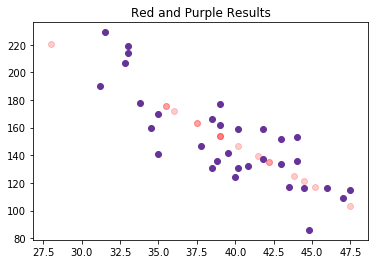

In [47]:
plt.title("Red and Purple Results")
plt.scatter(X_train, y_train, color='rebeccapurple')
plt.scatter(X_test, y_pred, color='red', alpha=0.2);

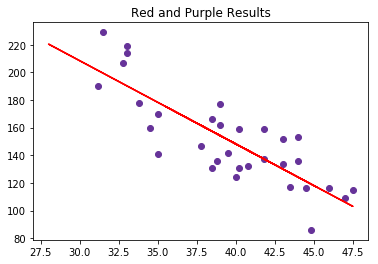

In [49]:
plt.title("Red and Purple Results")
plt.scatter(X_train, y_train, color='rebeccapurple')
plt.plot(X_test, y_pred, color='red');

In [50]:
# For reference, against the above graph:

print('Coefficient/slope:', model.coef_)
print('y-intercept:', model.intercept_)


Coefficient/slope: [-6.0195816]
y-intercept: 388.9916113182505


# Gotchas
---

# Deep Dive
---

# How to learn more: tips and hints
---

**Read the outputs**: Pay close attention to the outputs that Scikit Learn prints to the screen. Regular exposure to these outputs will regularly expose you to terms, arguments, vocabulary and grammar that are fundamental to understanding the inner workings of the models specifically and machine learning more generally. 

**Do outside research**: When you find a new word OR a word used in ways that you are not used to, look it up, read articles about that concept, read stackoverflow answers about that concept, and of course read the documentation. The word **regression** has been a thorn in my side since I first saw it. I just couldn't put my finger on what it means. I know what is happening in a regression calculation, but the **meaning** just escaped me. Why that word, to describe that phenomena? 

> "The term "regression" was coined by Francis Galton in the nineteenth century to describe a biological phenomenon. The phenomenon was that the heights of descendants of tall ancestors tend to regress down towards a normal average (a phenomenon also known as regression toward the mean)." 

> Source: [Wikipedia: Regression Analysis](https://en.wikipedia.org/wiki/Regression_analysis)

**Tear apart the examples**: The [original example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html) showing underfitting/overfitting was a bit more complicated than what I showed here, cause they opted to create a three panel chart and to automate the processing by putting the degrees into a list and cycling through the list using a for loop to generate all the charts...

I took individual lines, looked at each line, stripped away as much of the extraneous complications as I could to look at just the machine learning components and that greatly helped clarify what was going on.

# Experience Points!
---

# Read the docs...

Explore the docs related to Support Vector Machines for about 3 - 4 minutes, in particular the section related to Support Vector Classifiers.

[**SVC (link)**](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

Find answers to the following:

* what is the general limit on the number of samples that can be fed into this model?
* What is the default kernel?

---
When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# References
---

Below are references that may assist you in learning more:
    
|Title (link)|Comments|
|---|---|
|[API docs on linear models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)||
|[sklearn description of overfitting](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)||
|[Wikipedia article on overfitting](https://en.wikipedia.org/wiki/Overfitting)||
|[Wikipedia article on regression analysis](https://en.wikipedia.org/wiki/Regression_analysis)||
|[Skincancer dataset](https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/skincancer/index.txt)||